In [1]:
#basic libraries
import pandas as pd
import numpy as np
from math import *

#graphing libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

#system libraries
import os
import statistics
from datetime import datetime

#sklearn
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle

#tensorflow
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

#keras
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.wrappers.scikit_learn import KerasClassifier

# A fun illusion

<!-- https://duckduckgo.com/?q=gif+for+artificial+neural+network&iax=images&ia=images&iai=https%3A%2F%2Fthumbs.gfycat.com%2FMiniatureDependentCob-size_restricted.gif -->

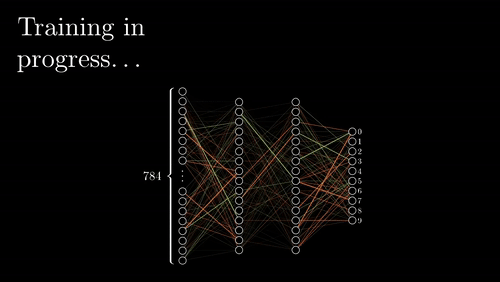

In [2]:
# Reading the Train and test dataset's
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# seperating actual labels from the pixel values.
X_train = np.array(train.drop('label', axis = 1))
Y_train = np.array(train['label'])

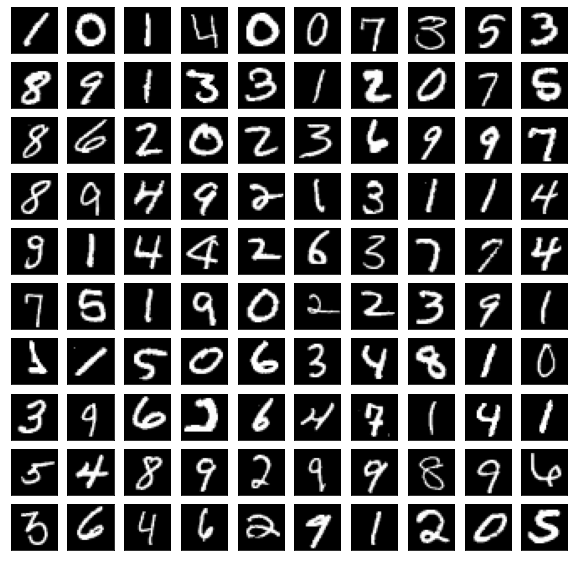

In [5]:
# visualization of the 100 labels
plt.figure(figsize =(10, 10))
for i in range(100):
    plt.subplot(10,10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i].reshape(28,28), cmap = 'gray')
plt.show()

In [6]:
# checking the shapes and reshaging if required 
X_train.shape

(42000, 784)

In [7]:
# One Hot Encoding the labels
Y_train_enc = to_categorical(Y_train, num_classes = 10)
Y_train_enc[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [8]:
# Defining the Neural Network model
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(10, activation='sigmoid'),
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                        

In [10]:
# compiling the model with the loss function
# ref-https://keras.io/api/optimizers/
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)

In [11]:
model.compile(loss="categorical_crossentropy",
              optimizer=optimizer,
              metrics = ['accuracy'])

In [12]:
# fitting the model
model.fit(X_train, Y_train_enc, batch_size=100, epochs=100)

Epoch 1/100
420/420 [==============================] - 3s 4ms/step - loss: 1.8455 - accuracy: 0.3739
Epoch 2/100
420/420 [==============================] - 2s 5ms/step - loss: 1.2051 - accuracy: 0.6188
Epoch 3/100
420/420 [==============================] - 2s 5ms/step - loss: 0.9419 - accuracy: 0.7088
Epoch 4/100
420/420 [==============================] - 2s 4ms/step - loss: 0.7978 - accuracy: 0.7588
Epoch 5/100
420/420 [==============================] - 2s 4ms/step - loss: 0.6970 - accuracy: 0.7911
Epoch 6/100
420/420 [==============================] - 2s 4ms/step - loss: 0.6239 - accuracy: 0.8179
Epoch 7/100
420/420 [==============================] - 2s 4ms/step - loss: 0.5663 - accuracy: 0.8360
Epoch 8/100
420/420 [==============================] - 2s 5ms/step - loss: 0.5287 - accuracy: 0.8494
Epoch 9/100
420/420 [==============================] - 2s 4ms/step - loss: 0.4898 - accuracy: 0.8585
Epoch 10/100
420/420 [==============================] - 2s 5ms/step - loss: 0.4565 - accura

420/420 [==============================] - 2s 5ms/step - loss: 0.1225 - accuracy: 0.9692
Epoch 82/100
420/420 [==============================] - 2s 5ms/step - loss: 0.1267 - accuracy: 0.9688
Epoch 83/100
420/420 [==============================] - 2s 5ms/step - loss: 0.1218 - accuracy: 0.9682
Epoch 84/100
420/420 [==============================] - 2s 5ms/step - loss: 0.1258 - accuracy: 0.9669
Epoch 85/100
420/420 [==============================] - 2s 5ms/step - loss: 0.1258 - accuracy: 0.9677
Epoch 86/100
420/420 [==============================] - 2s 5ms/step - loss: 0.1211 - accuracy: 0.9689
Epoch 87/100
420/420 [==============================] - 2s 5ms/step - loss: 0.1232 - accuracy: 0.9683
Epoch 88/100
420/420 [==============================] - 2s 5ms/step - loss: 0.1174 - accuracy: 0.9699
Epoch 89/100
420/420 [==============================] - 2s 5ms/step - loss: 0.1153 - accuracy: 0.9704
Epoch 90/100
420/420 [==============================] - 2s 5ms/step - loss: 0.1190 - accuracy: 

In [13]:
# predicting the test labels given the tset dataset.
Y_predict = model.predict(test)
Y_predict = np.argmax(Y_predict, axis=1)

In [14]:
# printing predictions
Y_predict

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [15]:
# ref -https://stackoverflow.com/questions/34864695/saving-prediction-results-to-csv
# prediction = pd.DataFrame(Y_predict).to_csv('prediction.csv')


# Saving predictions as CSV file to submit
# to submit the prediction to kaggle we need to rename the index column  
# Also increament the index value by 1 as submission starts index start from 1 to 28000
# incremented in above cell


res = pd.DataFrame(Y_predict)
res.index = test.index + 1 # its important for comparison
res.columns = ["Label"]
res.index.rename('ImageId', inplace = True)
res.to_csv("prediction_results.csv")

# Here is the screenshot of the attached predicted submissions.
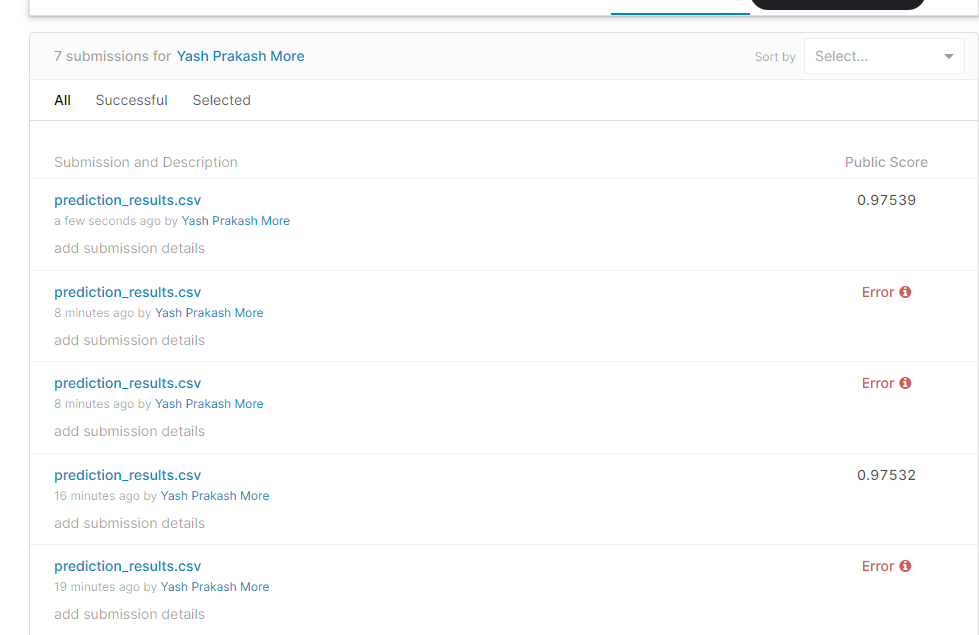

In [16]:
# As we dont have ground truth given with in the text dataset.
# I have created my own test set using the  train set of the given dataset from kaggle using test_train_split.
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size = 0.3, random_state=45931)

In [17]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

Y_predict = model.predict(x_test)


(29400, 784)
(29400,)
(12600, 784)
(12600,)


In [18]:
Y_predict = np.argmax(Y_predict, axis=1)
print(Y_predict)

[5 5 1 ... 5 9 1]


In [19]:
# Accuracy using RMSE
print("Accuracy of ANN:", accuracy_score(y_test,Y_predict))
print("Root Mean Squared Error of ANN:", mean_squared_error(y_test,Y_predict))

Accuracy of ANN: 0.9973015873015874
Root Mean Squared Error of ANN: 0.05785714285714286


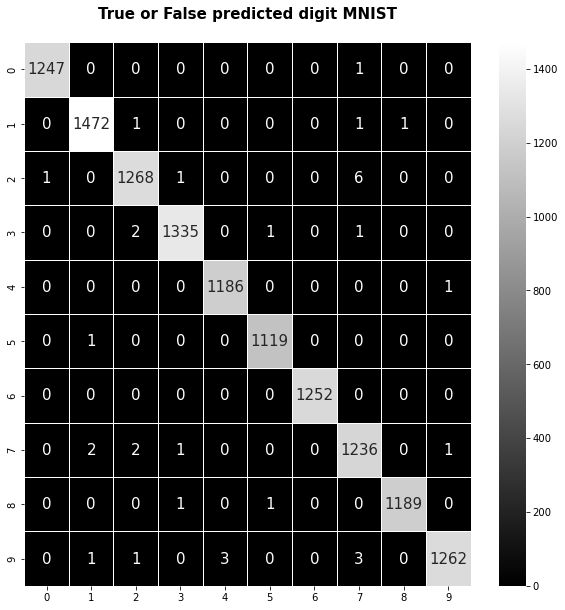

In [20]:
# ref - https://medium.com/analytics-vidhya/applying-ann-digit-and-fashion-mnist-13accfc44660
# ref - https://medium.com/@prtk13061992/mnist-dataset-using-deep-learning-algorithm-ann-c6f83aa594f5
# Accuracy using confusion matrix
#evaluate the model for testing dataset
con_mat=confusion_matrix(y_test,Y_predict)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()